# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the dataframe as df

df = pd.read_csv(r'C:\Users\soura\Desktop\Upgrad\Logistic Regression\Case study\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
original_len = len(df)
original_len

9240

In [5]:
#Lets check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#Checking the statistics of continuous variables

df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


Few outliers are present, we can remove them

In [7]:
#Replacing all the 'select' as null values

df = df.replace({'Select':np.nan})
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#Checking the missing values percentage for each column

(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#Removing Columns with High percentage values (Like 40% and above)

df = df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

# Data Modification (Handling categorical variables and treating missing values)

In [11]:
#Lets check the unique values of Country column
df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Germany                 0.000590
Sweden                  0.000443
China                   0.000295
Italy                   0.000295
Philippines             0.000295
Bangladesh              0.000295
Ghana                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Uganda                  0.000295
Asia/Pacific Region     0.000295
Denmark                 0.000148
Switzerland             0.000148
Liberia   

In [12]:
#Highly Skewed data, lets remove this column!

df = df.drop('Country',axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [13]:
#We dont need the Prospect ID and Lead Number, lets drop them!

df = df.drop('Prospect ID',axis=1)
df = df.drop('Lead Number',axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [14]:
#Lets check the unique values of Specialization

df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [15]:
#Lets club the values with less than 5% into 1 group called Others

df['Specialization'].replace({'Media and Advertising':'Others','Travel and Tourism':'Others','Services Excellence':'Others','E-Business':'Others','Healthcare Management':'Others','Hospitality Management':'Others','Rural and Agribusiness':'Others','Retail Management':'Others','E-COMMERCE':'Others','International Business':'Others'},inplace=True)
df['Specialization'].value_counts()

Others                               1239
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Name: Specialization, dtype: int64

In [16]:
#This is a sensitive column as it addresses our problem. Lets make the null values as freshers

df['Specialization'] = df['Specialization'].fillna('Freshers')
df['Specialization'].value_counts(normalize=True)

Freshers                             0.365801
Others                               0.134091
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Name: Specialization, dtype: float64

In [17]:
#Lets check the unique values of the course selection criteria column

df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
#Again highly skewed, lets remove it
df = df.drop('What matters most to you in choosing a course',axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Freshers,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Freshers,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Others,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Freshers,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [19]:
#Lets remove Tag variable since it is a score variable

df = df.drop('Tags',axis = 1)

In [20]:
#Checking the column of occupation

df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [21]:
#This is also a sensitive column but because of high skewness,we have to remove it. The model wont learn properly

df = df.drop('What is your current occupation',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
#Again checking missing value percentages

(df.isnull().sum()/len(df))*100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.

In [23]:
#Lets remove the rows with missing values and check the final missing values

df = df.dropna()
(df.isnull().sum()/len(df))*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

In [24]:
#Checking the Newspaper column
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [25]:
#Its a high skewed column, we should drop it
df = df.drop('Newspaper',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [27]:
#Checking Lead Source
df['Lead Source'].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Social Media         0.000220
Press_Release        0.000220
Live Chat            0.000220
Pay per Click Ads    0.000110
testone              0.000110
WeLearn              0.000110
youtubechannel       0.000110
NC_EDM               0.000110
welearnblog_Home     0.000110
blog                 0.000110
Name: Lead Source, dtype: float64

In [28]:
#Few categories got repeated here, like google has been created again.Lets add it to the parent category Google

df['Lead Source'] = df['Lead Source'].replace({'google':'Google'})
df['Lead Source'].value_counts(normalize=True)


Google               0.316619
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
Click2call           0.000441
Social Media         0.000220
Press_Release        0.000220
Live Chat            0.000220
Pay per Click Ads    0.000110
WeLearn              0.000110
testone              0.000110
NC_EDM               0.000110
youtubechannel       0.000110
welearnblog_Home     0.000110
blog                 0.000110
Name: Lead Source, dtype: float64

In [29]:
#Lets group the categories with data less than 10% into 1 category called Others

t = df['Lead Source'].value_counts(normalize=True).reset_index()
list1 = t['index'][t['Lead Source']<0.1]
d={}
for i in list1:
    d[i]='Others'
df['Lead Source'] = df['Lead Source'].replace(d)

In [30]:
df['Lead Source'].value_counts(normalize=True)

Google            0.316619
Direct Traffic    0.280251
Olark Chat        0.193189
Organic Search    0.127177
Others            0.082764
Name: Lead Source, dtype: float64

In [31]:
df['Do Not Email'].value_counts(normalize=True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

In [32]:
#This is highly skewed. Lets remove it
df = df.drop('Do Not Email',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [33]:
#Lets check the outlier effect of total visits on converted by comparing mean and median

df['TotalVisits'].groupby(df['Converted']).median()

Converted
0    3.0
1    3.0
Name: TotalVisits, dtype: float64

In [34]:
df['TotalVisits'].groupby(df['Converted']).mean()

Converted
0    3.331442
1    3.660553
Name: TotalVisits, dtype: float64

We can infer the outlier effect is quite stable

In [35]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Marked Spam               0.000220
Email Received                  0.000220
Resubscribed to emails          0.000110
Visited Booth in Tradeshow      0.000110
Name: Last Activity, dtype: float64

In [36]:
#Lets group the categories with data less than 25% into 1 category called Others

t = df['Last Activity'].value_counts(normalize=True).reset_index()
list1 = t['index'][t['Last Activity']<0.1]
d={}
for i in list1:
    d[i]='Others'
df['Last Activity'] = df['Last Activity'].replace(d)

In [37]:
df['Last Activity'].value_counts(normalize=True)

Email Opened               0.378223
SMS Sent                   0.299317
Others                     0.215341
Olark Chat Conversation    0.107119
Name: Last Activity, dtype: float64

In [38]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [40]:
#Highly skewed, lets drop it

df = df.drop('Search',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
df['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [42]:
#Again its a skewed column, acting like a constant column since all the values are No

df = df.drop('Magazine',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [44]:
#Again its a skewed column

df = df.drop('Newspaper Article',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [46]:
#Again its a skewed column

df = df.drop('X Education Forums',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [48]:
#Again its a skewed column

df = df.drop('Digital Advertisement',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [50]:
#Again its a skewed column

df = df.drop('Through Recommendations',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [52]:
#Again its a skewed column

df = df.drop('Receive More Updates About Our Courses',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
#Again its a skewed column

df = df.drop('Update me on Supply Chain Content',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [56]:
#Again its a skewed column

df = df.drop('Get updates on DM Content',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [58]:
#Again its a skewed column

df = df.drop('I agree to pay the amount through cheque',axis=1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [59]:
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [60]:
df['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Form Submitted on Website       0.000110
Email Received                  0.000110
Approached upfront              0.000110
View in browser link Clicked    0.000110
Resubscribed to emails          0.000110
Name: Last Notable Activity, dtype: float64

In [61]:
#Lets group the categories with data less than 20% into 1 category called Others

t = df['Last Notable Activity'].value_counts(normalize=True).reset_index()
list1 = t['index'][t['Last Notable Activity']<0.1]
d={}
for i in list1:
    d[i]='Others'
df['Last Notable Activity'] = df['Last Notable Activity'].replace(d)

In [62]:
df['Last Notable Activity'].value_counts(normalize=True)

Modified        0.360040
Email Opened    0.311109
SMS Sent        0.237161
Others          0.091691
Name: Last Notable Activity, dtype: float64

<b>Treating Outliers</b>

In [63]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


We see the mean and median are not much affected because of few outliers. Hence it is okay to skip this step

In [64]:
#Removing any row with missing values

df = df.dropna()
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [65]:
#Calculating rows retained

(len(df)/original_len)*100

98.2034632034632

# EDA

In [66]:
#Lets make two dataframes for converted 1 and not converted O
converted = df[df['Converted']==1]
converted

,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Yes,Email Opened
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Others,Freshers,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Others,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Others,Human Resource Management,Yes,Others
...,...,...,...,...,...,...,...,...,...,...,...
9233,API,Direct Traffic,No,1,13.0,1409,2.60,SMS Sent,Freshers,No,SMS Sent
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,No,Modified
9235,Landing Page Submission,Direct Traffic,No,1,8.0,1845,2.67,Others,IT Projects Management,No,Others
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,No,SMS Sent


In [67]:
not_converted = df[df['Converted']==0]
not_converted

,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Freshers,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Freshers,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Others,No,Modified
5,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Freshers,No,Modified
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Freshers,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...
9226,API,Olark Chat,No,0,0.0,0,0.0,SMS Sent,Freshers,No,Modified
9230,Landing Page Submission,Google,No,0,2.0,870,2.0,Email Opened,Human Resource Management,No,Email Opened
9232,Landing Page Submission,Direct Traffic,No,0,2.0,1770,2.0,SMS Sent,Human Resource Management,Yes,SMS Sent
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.0,SMS Sent,Others,Yes,SMS Sent


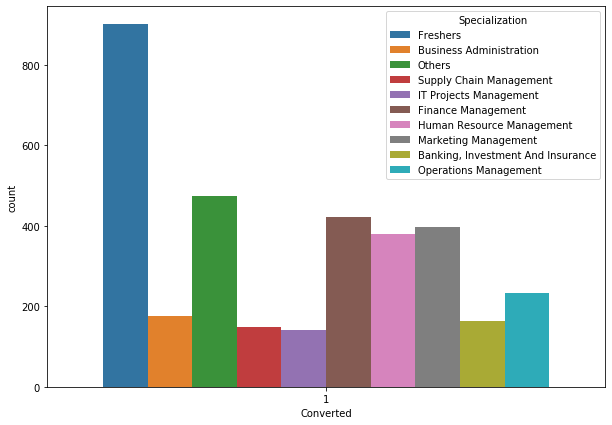

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(converted['Converted'],hue=df['Specialization'])
plt.show()

Apart from freshers, we observe the core management guys with marketing,finance and HR have a higher conversion

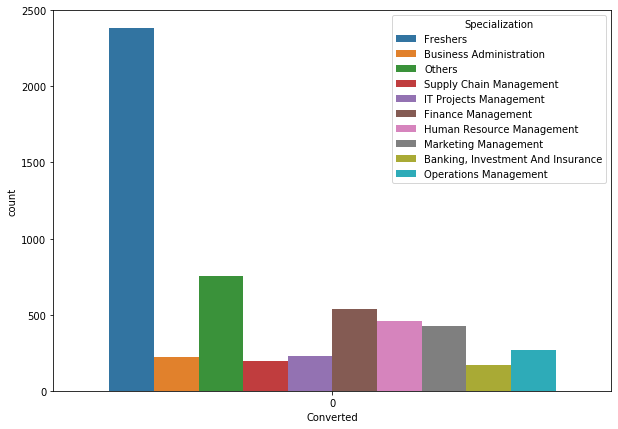

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(not_converted['Converted'],hue=df['Specialization'])
plt.show()

Hence we can infer, we should focus on people more on the core specialization subjects in masters.

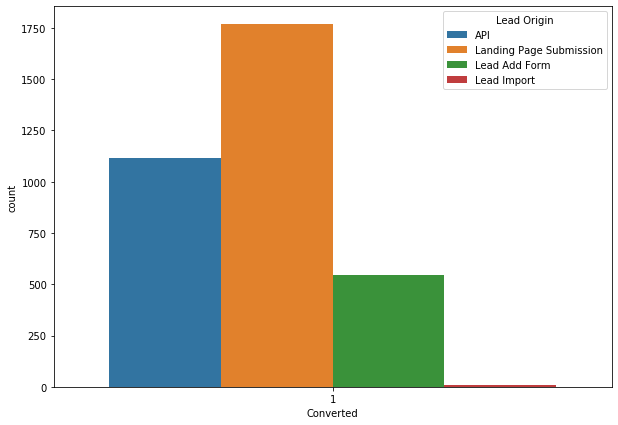

In [70]:
plt.figure(figsize=(10,7))
sns.countplot(converted['Converted'],hue=df['Lead Origin'])
plt.show()

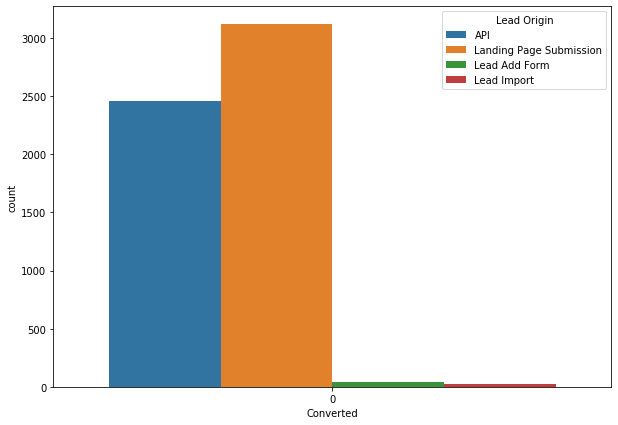

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(not_converted['Converted'],hue=df['Lead Origin'])
plt.show()

Here we can see we should not prioritize leads originated from import.

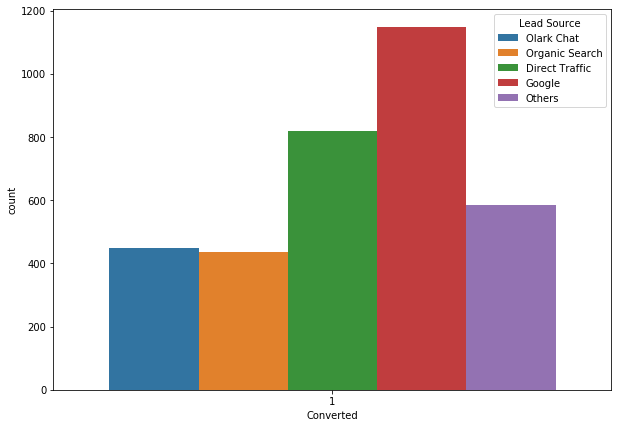

In [72]:
plt.figure(figsize=(10,7))
sns.countplot(converted['Converted'],hue=df['Lead Source'])
plt.show()

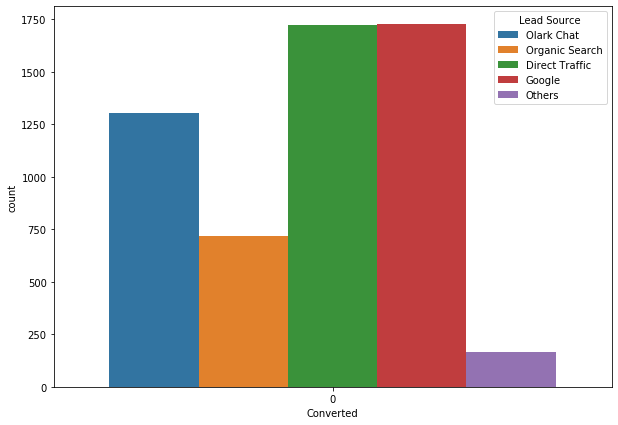

In [73]:
plt.figure(figsize=(10,7))
sns.countplot(not_converted['Converted'],hue=df['Lead Source'])
plt.show()

We can observe, while Olark chat and organic searches are turning out efficient sources, we should not miss the other sources,those are turning to be highly effective. Hence we should give equal importance to all the sources

In [74]:
#We should not priotize those leads whole page views per visit is less than 2

not_converted['Page Views Per Visit'].median()

2.0

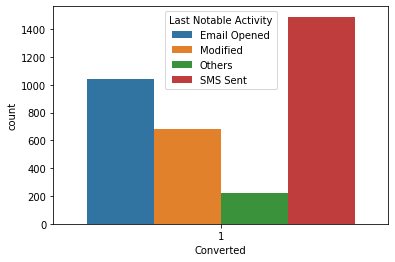

In [75]:
sns.countplot(x=converted['Converted'],hue=converted['Last Notable Activity'])

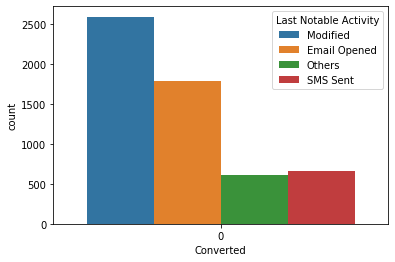

In [76]:
sns.countplot(x=not_converted['Converted'],hue=not_converted['Last Notable Activity'])

We observe something interesting. Apart from email, SMS is turning out to be an interesting activity.Its showing conversion for many leads.

# Data Transformation

In [77]:
#lets form a new dataframe df_new

df_new = df

Lets convert the categorical variables into dummies

In [78]:
#Lets make a list of all categorical columns

cat_column = df_new.select_dtypes(exclude=['int64','float64']).columns
cat_column

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [79]:
#Lets make a list of all continuous variables with 'Converted' column removed

cont_column = df_new.select_dtypes(include=['int64','float64']).columns.drop('Converted')
cont_column

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [80]:
#Create dummies for categorical variables and dropping the first 

dummies = pd.get_dummies(df_new[cat_column],drop_first=True)
dummies

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Call_Yes,Last Activity_Olark Chat Conversation,Last Activity_Others,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9238,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [81]:
#Merging the dummies and the original data frame

df_new = pd.concat([df,dummies],axis=1)
df_new.head()

,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Freshers,No,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Freshers,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Others,No,...,0,0,0,0,1,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Freshers,No,...,0,0,0,0,0,0,0,1,0,0


In [82]:
#Lets drop the original columns and only keep their dummied column

df_new = df_new.drop(cat_column,axis=1)
df_new.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Do Not Call_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Business Administration',
       'Specialization_Finance Management', 'Specialization_Freshers',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='obj

In [83]:
#Checking the final shape of the dataframe
df_new.shape

(9074, 28)

# Splitting the dataset

In [84]:
#Lets split the data

from sklearn.model_selection import train_test_split
X = df_new.drop(['Converted'],axis=1)
y = df_new['Converted']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [87]:
#Lets fit and transform the data. We wont use scaling on categorical variables as they are already with absolute 0 or 1.So lets leave them untouched.We will scale the continuous variables with minmax scaler

X_train[cont_column] = scaler.fit_transform(X_train[cont_column])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9226,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
#We transform the test dataset based on training data

X_test[cont_column] = scaler.transform(X_test[cont_column])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3271,0.015936,0.070530,0.166667,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.019920,0.679695,0.208333,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7936,0.007968,0.033243,0.083333,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3830,0.031873,0.073675,0.333333,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


# Modeling

In [89]:
import statsmodels.api as sm

In [90]:
#Lets fit the model by adding a constant to the training and test data set

ls = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
ls.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.3
Date:                Mon, 07 Sep 2020   Deviance:                       5532.6
Time:                        13:32:09   Pearson chi2:                 6.61e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8264      0.241     -3.425      0.001      -1.299      -0.353
TotalVisits                                    6.6453      2.407      2.761      0.006       1.927      11.363
Total Time Spent on Website                    4.5550      0.161     28.229      0.000       4.239       4.871
Page Views Per Visit                          -1.3479      0.564     -2.390      0.017      -2.453      -0.243
Lead Origin_Landing Page Submission           -1.0838      0.131     -8.276      0.000      -1.340      -0.827
Lead Origin_Lead Add Form                      3.7011      0.356     10.404      0.000       3.004       4.398
Lead Origin_Lead Import                        0.8168      0.535      1.526      0.127      -0.232       1.866
Lead Source_Google                             0.3037      0.109      2.782      0.005       0.090       0.518
Lead Source_Olark Chat                         1.2806      0.157      8.139      0.000       0.972       1.589
Lead Source_Organic Search                     0.2159      0.124      1.740      0.082      -0.027       0.459
Lead Source_Others                             0.3025      0.295      1.026      0.305      -0.275       0.880
Do Not Call_Yes                               19.0928    1.2e+04      0.002      0.999   -2.36e+04    2.36e+04
Last Activity_Olark Chat Conversation         -1.4438      0.204     -7.080      0.000      -1.843      -1.044
Last Activity_Others                          -0.7161      0.163     -4.381      0.000      -1.036      -0.396
Last Activity_SMS Sent                         0.2933      0.179      1.636      0.102      -0.058       0.645
Specialization_Business Administration        -0.2843      0.233     -1.222      0.222      -0.740       0.172
Specialization_Finance Management             -0.1393      0.197     -0.708      0.479      -0.525       0.246
Specialization_Freshers                       -1.5947      0.205     -7.798      0.000      -1.996      -1.194
Specialization_Human Resource Management      -0.1969      0.199     -0.991      0.322      -0.586       0.192
Specialization_IT Projects Management         -0.1683      0.235     -0.717      0.473      -0.629       0.292
Specialization_Marketing Management           -0.0115      0.200     -0.058      0.954      -0.403       0.380
Specialization_Operations Management          -0.1384      0.219     -0.631      0.528      -0.568       0.292
Specialization_Others                         -0.3894      0.191     -2.041      0.041      -0.763      -0.015
Specialization_Supply Chain Management        -0.0962      0.237     -0.405      0.685      -0.561       0.369
A free copy of Mastering The Interview_Yes    -0.1718      0.104     -1.651      0.099

# RFE

In [91]:
#Lets use RFE to select the best 20 attributes from the dataset

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
#Checking the support
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True])

In [94]:
#Lets make a series of the columns selected

col = X_train.columns[rfe.support_]

In [95]:
#Fitting the model with the columns determined from RFE

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.9
Date:                Mon, 07 Sep 2020   Deviance:                       5535.8
Time:                        13:32:09   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9389      0.179     -5.249      0.000      -1.290      -0.588
TotalVisits                                    6.5829      2.401      2.742      0.006       1.878      11.288
Total Time Spent on Website                    4.5532      0.161     28.238      0.000       4.237       4.869
Page Views Per Visit                          -1.3188      0.562     -2.345      0.019      -2.421      -0.217
Lead Origin_Landing Page Submission           -1.0967      0.131     -8.399      0.000      -1.353      -0.841
Lead Origin_Lead Add Form                      3.7045      0.355     10.422      0.000       3.008       4.401
Lead Origin_Lead Import                        0.7975      0.536      1.488      0.137      -0.253       1.848
Lead Source_Google                             0.2970      0.109      2.730      0.006       0.084       0.510
Lead Source_Olark Chat                         1.2735      0.157      8.110      0.000       0.966       1.581
Lead Source_Organic Search                     0.2073      0.124      1.675      0.094      -0.035       0.450
Lead Source_Others                             0.2912      0.294      0.989      0.322      -0.286       0.868
Do Not Call_Yes                               19.1206   1.21e+04      0.002      0.999   -2.37e+04    2.38e+04
Last Activity_Olark Chat Conversation         -1.4364      0.204     -7.050      0.000      -1.836      -1.037
Last Activity_Others                          -0.7114      0.163     -4.357      0.000      -1.031      -0.391
Last Activity_SMS Sent                         0.2925      0.179      1.633      0.102      -0.059       0.644
Specialization_Freshers                       -1.4760      0.126    -11.672      0.000      -1.724      -1.228
Specialization_Others                         -0.2610      0.102     -2.560      0.010      -0.461      -0.061
A free copy of Mastering The Interview_Yes    -0.1758      0.104     -1.692      0.091      -0.379       0.028
Last Notable Activity_Modified                -0.3885      0.137     -2.830      0.005      -0.658      -0.119
Last Notable Activity_Others                   0.3543      0.202      1.753      0.080      -0.042       0.750
Last Notable Activity_SMS Sent                 1.0618      0.198      5.357      0.000       0.673       1.450
==============================================================================================================
"""

We see few attributes with high P values

Further Evaluation of attributes using Manual Selection

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
#Lets check the VIF of all the attributes

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_SMS Sent,9.39
19,Last Notable Activity_SMS Sent,9.17
17,Last Notable Activity_Modified,6.32
9,Lead Source_Others,6.25
4,Lead Origin_Lead Add Form,5.78
3,Lead Origin_Landing Page Submission,4.89
12,Last Activity_Others,4.60
2,Page Views Per Visit,4.55
18,Last Notable Activity_Others,3.10
14,Specialization_Freshers,2.93


We have obtained few variables with very high VIFs indicating high multicollinearity. Lets try to remove them 1 on 1

In [98]:
#Lets start with removing the variable with high VIF and high p value ie- 'Last Activity_SMS Sent'

remove=['Last Activity_SMS Sent']
logm2 = sm.GLM(y_train,X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2769.3
Date:                Mon, 07 Sep 2020   Deviance:                       5538.5
Time:                        13:32:09   Pearson chi2:                 6.62e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9420      0.179     -5.268      0.000      -1.292      -0.592
TotalVisits                                    6.5824      2.400      2.743      0.006       1.879      11.286
Total Time Spent on Website                    4.5490      0.161     28.231      0.000       4.233       4.865
Page Views Per Visit                          -1.3177      0.562     -2.343      0.019      -2.420      -0.216
Lead Origin_Landing Page Submission           -1.0935      0.131     -8.376      0.000      -1.349      -0.838
Lead Origin_Lead Add Form                      3.7240      0.355     10.495      0.000       3.029       4.419
Lead Origin_Lead Import                        0.8081      0.535      1.510      0.131      -0.241       1.857
Lead Source_Google                             0.2983      0.109      2.743      0.006       0.085       0.511
Lead Source_Olark Chat                         1.2663      0.157      8.074      0.000       0.959       1.574
Lead Source_Organic Search                     0.2083      0.124      1.682      0.093      -0.034       0.451
Lead Source_Others                             0.2837      0.294      0.966      0.334      -0.292       0.859
Do Not Call_Yes                               19.0601    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Activity_Olark Chat Conversation         -1.5727      0.185     -8.505      0.000      -1.935      -1.210
Last Activity_Others                          -0.8521      0.138     -6.192      0.000      -1.122      -0.582
Specialization_Freshers                       -1.4720      0.126    -11.647      0.000      -1.720      -1.224
Specialization_Others                         -0.2574      0.102     -2.524      0.012      -0.457      -0.058
A free copy of Mastering The Interview_Yes    -0.1731      0.104     -1.666      0.096      -0.377       0.030
Last Notable Activity_Modified                -0.2482      0.106     -2.351      0.019      -0.455      -0.041
Last Notable Activity_Others                   0.4949      0.182      2.719      0.007       0.138       0.852
Last Notable Activity_SMS Sent                 1.3537      0.086     15.752      0.000       1.185       1.522
==============================================================================================================
"""

We see an increase and decrease of P values for some attributes.

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].drop(remove,axis=1).values, i) for i in range(X_train[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Source_Others,6.25
4,Lead Origin_Lead Add Form,5.77
3,Lead Origin_Landing Page Submission,4.89
2,Page Views Per Visit,4.55
16,Last Notable Activity_Modified,3.79
12,Last Activity_Others,3.07
13,Specialization_Freshers,2.93
15,A free copy of Mastering The Interview_Yes,2.73
6,Lead Source_Google,2.52
17,Last Notable Activity_Others,2.45


The VIFs are still high, Lets remove 'Lead Source others' since it has high VIF and high P value

In [100]:
remove=['Last Activity_SMS Sent','Lead Source_Others']
logm2 = sm.GLM(y_train,X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2769.7
Date:                Mon, 07 Sep 2020   Deviance:                       5539.4
Time:                        13:32:10   Pearson chi2:                 6.63e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9145      0.177     -5.180      0.000      -1.261      -0.569
TotalVisits                                    6.7566      2.412      2.801      0.005       2.029      11.484
Total Time Spent on Website                    4.5448      0.161     28.225      0.000       4.229       4.860
Page Views Per Visit                          -1.2754      0.562     -2.271      0.023      -2.376      -0.175
Lead Origin_Landing Page Submission           -1.1061      0.130     -8.510      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                      3.9780      0.240     16.541      0.000       3.507       4.449
Lead Origin_Lead Import                        1.0620      0.467      2.273      0.023       0.146       1.978
Lead Source_Google                             0.2719      0.105      2.585      0.010       0.066       0.478
Lead Source_Olark Chat                         1.2356      0.153      8.051      0.000       0.935       1.536
Lead Source_Organic Search                     0.1836      0.121      1.515      0.130      -0.054       0.421
Do Not Call_Yes                               19.0553    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Activity_Olark Chat Conversation         -1.5690      0.185     -8.486      0.000      -1.931      -1.207
Last Activity_Others                          -0.8497      0.138     -6.174      0.000      -1.119      -0.580
Specialization_Freshers                       -1.4682      0.126    -11.620      0.000      -1.716      -1.221
Specialization_Others                         -0.2562      0.102     -2.513      0.012      -0.456      -0.056
A free copy of Mastering The Interview_Yes    -0.1853      0.103     -1.799      0.072      -0.387       0.017
Last Notable Activity_Modified                -0.2487      0.106     -2.355      0.019      -0.456      -0.042
Last Notable Activity_Others                   0.4934      0.182      2.711      0.007       0.137       0.850
Last Notable Activity_SMS Sent                 1.3511      0.086     15.734      0.000       1.183       1.519
==============================================================================================================
"""

The P values have reduced significantly, but still high for few variables

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].drop(remove,axis=1).values, i) for i in range(X_train[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.88
2,Page Views Per Visit,4.41
15,Last Notable Activity_Modified,3.79
11,Last Activity_Others,3.06
12,Specialization_Freshers,2.85
14,A free copy of Mastering The Interview_Yes,2.71
16,Last Notable Activity_Others,2.45
6,Lead Source_Google,2.40
7,Lead Source_Olark Chat,2.24
1,Total Time Spent on Website,2.18


Now the VIFs are in tolerance range, lets drop 'Do not call yes' as it has very high P value

In [102]:
remove=['Last Activity_SMS Sent','Do Not Call_Yes','Lead Source_Others']
logm2 = sm.GLM(y_train,X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.1
Date:                Mon, 07 Sep 2020   Deviance:                       5540.3
Time:                        13:32:10   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9118      0.177     -5.165      0.000      -1.258      -0.566
TotalVisits                                    6.7669      2.413      2.804      0.005       2.037      11.497
Total Time Spent on Website                    4.5451      0.161     28.231      0.000       4.230       4.861
Page Views Per Visit                          -1.2779      0.562     -2.275      0.023      -2.379      -0.177
Lead Origin_Landing Page Submission           -1.1088      0.130     -8.534      0.000      -1.364      -0.854
Lead Origin_Lead Add Form                      3.9878      0.241     16.577      0.000       3.516       4.459
Lead Origin_Lead Import                        1.0600      0.467      2.268      0.023       0.144       1.976
Lead Source_Google                             0.2716      0.105      2.582      0.010       0.065       0.478
Lead Source_Olark Chat                         1.2346      0.153      8.045      0.000       0.934       1.535
Lead Source_Organic Search                     0.1832      0.121      1.512      0.131      -0.054       0.421
Last Activity_Olark Chat Conversation         -1.5621      0.184     -8.481      0.000      -1.923      -1.201
Last Activity_Others                          -0.8496      0.138     -6.175      0.000      -1.119      -0.580
Specialization_Freshers                       -1.4717      0.126    -11.651      0.000      -1.719      -1.224
Specialization_Others                         -0.2541      0.102     -2.494      0.013      -0.454      -0.054
A free copy of Mastering The Interview_Yes    -0.1860      0.103     -1.806      0.071      -0.388       0.016
Last Notable Activity_Modified                -0.2482      0.106     -2.350      0.019      -0.455      -0.041
Last Notable Activity_Others                   0.4922      0.182      2.705      0.007       0.136       0.849
Last Notable Activity_SMS Sent                 1.3513      0.086     15.733      0.000       1.183       1.520
==============================================================================================================
"""

The P values look somewhat good now!


In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].drop(remove,axis=1).values, i) for i in range(X_train[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.88
2,Page Views Per Visit,4.41
14,Last Notable Activity_Modified,3.78
10,Last Activity_Others,3.06
11,Specialization_Freshers,2.85
13,A free copy of Mastering The Interview_Yes,2.71
15,Last Notable Activity_Others,2.45
6,Lead Source_Google,2.40
7,Lead Source_Olark Chat,2.24
1,Total Time Spent on Website,2.18


The VIF values and P values have dropped significantly,Lets remove 'Lead Source_Organic Search' as it has high P value

In [104]:
remove=['Last Activity_SMS Sent','Do Not Call_Yes','Lead Source_Others','Lead Source_Organic Search']
logm2 = sm.GLM(y_train,X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Mon, 07 Sep 2020   Deviance:                       5542.5
Time:                        13:32:10   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8531      0.172     -4.965      0.000      -1.190      -0.516
TotalVisits                                    7.0039      2.464      2.842      0.004       2.174      11.834
Total Time Spent on Website                    4.5436      0.161     28.224      0.000       4.228       4.859
Page Views Per Visit                          -1.0903      0.548     -1.990      0.047      -2.164      -0.016
Lead Origin_Landing Page Submission           -1.1426      0.128     -8.933      0.000      -1.393      -0.892
Lead Origin_Lead Add Form                      3.9215      0.236     16.595      0.000       3.458       4.385
Lead Origin_Lead Import                        0.9910      0.465      2.131      0.033       0.079       1.902
Lead Source_Google                             0.2027      0.095      2.144      0.032       0.017       0.388
Lead Source_Olark Chat                         1.1669      0.146      7.969      0.000       0.880       1.454
Last Activity_Olark Chat Conversation         -1.5623      0.184     -8.485      0.000      -1.923      -1.201
Last Activity_Others                          -0.8468      0.138     -6.151      0.000      -1.117      -0.577
Specialization_Freshers                       -1.4628      0.126    -11.611      0.000      -1.710      -1.216
Specialization_Others                         -0.2344      0.101     -2.320      0.020      -0.432      -0.036
A free copy of Mastering The Interview_Yes    -0.2030      0.102     -1.984      0.047      -0.404      -0.002
Last Notable Activity_Modified                -0.2491      0.106     -2.358      0.018      -0.456      -0.042
Last Notable Activity_Others                   0.4869      0.182      2.676      0.007       0.130       0.844
Last Notable Activity_SMS Sent                 1.3542      0.086     15.778      0.000       1.186       1.522
==============================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].drop(remove,axis=1).values, i) for i in range(X_train[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.86
2,Page Views Per Visit,3.93
13,Last Notable Activity_Modified,3.78
9,Last Activity_Others,3.06
10,Specialization_Freshers,2.73
12,A free copy of Mastering The Interview_Yes,2.71
14,Last Notable Activity_Others,2.45
1,Total Time Spent on Website,2.17
7,Lead Source_Olark Chat,2.16
8,Last Activity_Olark Chat Conversation,2.10


Lets try to achieve 15 variables. Now if I remove any attribute with high P value, p value for other attributes increases. Lets try removing the attribute with the highest VIF ie. 'Lead Origin_Landing Page Submission'

In [106]:
remove=['Last Activity_SMS Sent','Do Not Call_Yes','Lead Source_Others','Lead Source_Organic Search','Lead Origin_Landing Page Submission']
logm2 = sm.GLM(y_train,X_train_sm.drop(remove,axis=1), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.5
Date:                Mon, 07 Sep 2020   Deviance:                       5625.1
Time:                        13:32:10   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.7946      0.136    -13.232      0.000      -2.060      -1.529
TotalVisits                                    8.2310      2.649      3.107      0.002       3.039      13.423
Total Time Spent on Website                    4.6280      0.160     28.850      0.000       4.314       4.942
Page Views Per Visit                          -1.4260      0.553     -2.580      0.010      -2.509      -0.343
Lead Origin_Lead Add Form                      4.4678      0.228     19.605      0.000       4.021       4.914
Lead Origin_Lead Import                        1.6636      0.446      3.733      0.000       0.790       2.537
Lead Source_Google                             0.2580      0.094      2.749      0.006       0.074       0.442
Lead Source_Olark Chat                         1.5333      0.140     10.927      0.000       1.258       1.808
Last Activity_Olark Chat Conversation         -1.5187      0.182     -8.332      0.000      -1.876      -1.161
Last Activity_Others                          -0.8638      0.136     -6.338      0.000      -1.131      -0.597
Specialization_Freshers                       -0.7710      0.096     -8.000      0.000      -0.960      -0.582
Specialization_Others                         -0.2149      0.100     -2.153      0.031      -0.411      -0.019
A free copy of Mastering The Interview_Yes    -0.3600      0.100     -3.609      0.000      -0.556      -0.164
Last Notable Activity_Modified                -0.2510      0.104     -2.404      0.016      -0.456      -0.046
Last Notable Activity_Others                   0.4898      0.180      2.716      0.007       0.136       0.843
Last Notable Activity_SMS Sent                 1.3210      0.085     15.523      0.000       1.154       1.488
==============================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].drop(remove,axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train[col].drop(remove,axis=1).values, i) for i in range(X_train[col].drop(remove,axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,3.69
2,Page Views Per Visit,3.41
8,Last Activity_Others,3.04
13,Last Notable Activity_Others,2.45
9,Specialization_Freshers,2.38
1,Total Time Spent on Website,2.14
6,Lead Source_Olark Chat,2.13
7,Last Activity_Olark Chat Conversation,2.10
11,A free copy of Mastering The Interview_Yes,2.04
0,TotalVisits,1.93


Hence we have achieved our 15 variables with low VIFs and P values

# Prediction on train set

In [108]:
#Lets predict on training dataset

y_train_pred = res.predict(X_train_sm.drop(remove,axis=1))
y_train_pred[:10]

3009    0.200620
1012    0.069277
9226    0.216992
4750    0.912320
7987    0.779557
1281    0.863259
2880    0.166855
4971    0.927411
7536    0.833387
1248    0.657810
dtype: float64

In [109]:
#reshaping the predicted series

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2006204 , 0.06927706, 0.21699216, 0.91232046, 0.77955736,
       0.86325904, 0.16685519, 0.9274106 , 0.83338737, 0.65781038])

In [110]:
#Transforming into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Rate':y_train_pred})
y_train_pred_final['Conversion_Rate'] = y_train_pred_final['Conversion_Rate']
y_train_pred_final.head()

,Converted,Conversion_Rate
0,0,0.200620
1,0,0.069277
2,0,0.216992
3,1,0.912320
4,1,0.779557


# Model Validation

In [111]:
#Lets calculate the predicted conversion with different cut off points

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200620,1,1,1,0,0,0,0,0,0,0
1,0,0.069277,1,0,0,0,0,0,0,0,0,0
2,0,0.216992,1,1,1,0,0,0,0,0,0,0
3,1,0.912320,1,1,1,1,1,1,1,1,1,1
4,1,0.779557,1,1,1,1,1,1,1,1,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.575342  0.972608  0.326504
0.2   0.2  0.721304  0.919052  0.597439
0.3   0.3  0.791057  0.837694  0.761844
0.4   0.4  0.800661  0.766558  0.822023
0.5   0.5  0.800504  0.685200  0.872727
0.6   0.6  0.784601  0.569910  0.919078
0.7   0.7  0.763187  0.473835  0.944430
0.8   0.8  0.732955  0.362633  0.964917
0.9   0.9  0.689970  0.219133  0.984891


We observe a convergence somewhere around 0.3 and 0.4, Lets verify it from the graph

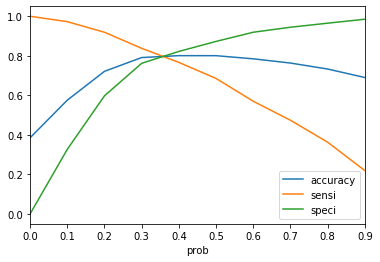

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

With an objective to increase the Sensitivity of the problem to atleast 80%, judging from the above curve lets choose <b>0.3</b> as the optimal cutoff point 

In [114]:
#Checking the ROC Curve and the AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Rate, drop_intermediate = False )

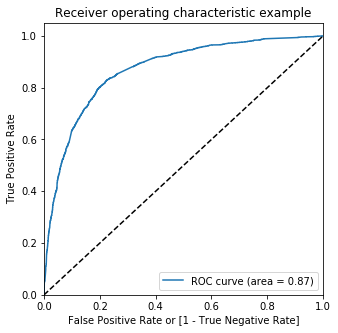

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Rate)

We confirm our test by the ROC curve.The curve is more inclined towards the left corner border (away from the 45 degree line).The AUC score obtained is very good

In [117]:
#Creating a new column predicted with cutoff 0.35
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.200620,1,1,1,0,0,0,0,0,0,0,0
1,0,0.069277,1,0,0,0,0,0,0,0,0,0,0
2,0,0.216992,1,1,1,0,0,0,0,0,0,0,0
3,1,0.912320,1,1,1,1,1,1,1,1,1,1,1
4,1,0.779557,1,1,1,1,1,1,1,1,0,0,1


In [118]:
#Lets plot the confusion matrix

cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
cm

array([[2975,  930],
       [ 397, 2049]], dtype=int64)

In [119]:
#Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7910565265312549

The accuracy score is very good. Lets look at other score metrics

In [120]:

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [121]:
#Sensitivity

print(TP/(TP+FN))

0.8376941946034342


Our objective was to correctly identify the qualifying leads and decrease the error of predicting them wrong. Here with high sensitivity (above 80%) we can be sure than 80% of the time we wont miss out on the high potential lead.

In [122]:
#Specificity

print(TN/(TN+FP))

0.7618437900128041


High specificity is OK here, because marketing on a low potential lead is OK if their number is low.

<b>Precision and Recall</b>

In [123]:
#Precision

print(TP/(TP+FP))

0.6878147029204431


It is a good value which shows the model power of detecting the actual potential leads

In [124]:
#Recall

print(TP/(TP+FN))

0.8376941946034342


A good recall number.It is basically the sensitivity and the value obtained is sufficient for our marketing problem

In [125]:
#Adding the lead scores

y_train_pred_final['Lead Score'] = (y_train_pred_final['Conversion_Rate'])*100
y_train_pred_final

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score
0,0,0.200620,1,1,1,0,0,0,0,0,0,0,0,20.062040
1,0,0.069277,1,0,0,0,0,0,0,0,0,0,0,6.927706
2,0,0.216992,1,1,1,0,0,0,0,0,0,0,0,21.699216
3,1,0.912320,1,1,1,1,1,1,1,1,1,1,1,91.232046
4,1,0.779557,1,1,1,1,1,1,1,1,0,0,1,77.955736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.106064,1,1,0,0,0,0,0,0,0,0,0,10.606384
6347,1,0.346321,1,1,1,1,0,0,0,0,0,0,1,34.632149
6348,0,0.961698,1,1,1,1,1,1,1,1,1,1,1,96.169811
6349,0,0.328418,1,1,1,1,0,0,0,0,0,0,1,32.841753


# Prediction on test set

In [126]:
#lets filter out X test data by the RFE model
X_test = X_test[col]

In [127]:
#Lets filter out the new X test by the manual selection model
X_test = X_test.drop(remove,axis=1)
X_test.shape

(2723, 15)

In [128]:
#Lets add the constant
X_test_sm = sm.add_constant(X_test)

In [129]:
#Lets predict the test data

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.110303
1490    0.655445
7936    0.099127
4216    0.900907
3830    0.096088
1800    0.204239
6507    0.493204
4821    0.312193
4223    0.961698
4714    0.216992
dtype: float64

In [130]:
#Reshaping the series

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.11030331, 0.65544508, 0.09912686, 0.90090661, 0.09608799,
       0.2042387 , 0.49320448, 0.31219286, 0.96169811, 0.21699216])

In [131]:
#Forming the dataframe

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Rate':y_test_pred})
y_test_pred_final['Conversion_Rate'] = y_test_pred_final['Conversion_Rate']
y_test_pred_final.head()

,Converted,Conversion_Rate
0,0,0.110303
1,1,0.655445
2,0,0.099127
3,1,0.900907
4,0,0.096088


In [132]:
#Setting the cutoff of 0.3

y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Rate.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_Rate,Predicted
0,0,0.110303,0
1,1,0.655445,1
2,0,0.099127,0
3,1,0.900907,1
4,0,0.096088,0


In [133]:
#Lets check the confusion matrix

cm = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
cm

array([[1323,  411],
       [ 182,  807]], dtype=int64)

In [134]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [135]:
#Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.7822254865956666

In [136]:
#Sensitivity

print(TP/(TP+FN))

0.8159757330637007


In [137]:
#Specificity

print(TN/(TN+FP))

0.7629757785467128


In [138]:
#Precision

print(TP/(TP+FP))

0.6625615763546798


In [139]:
#Recall

print(TP/(TP+FN))

0.8159757330637007


We have obtained some good scores for the test data as well. The sensitivity is high and is approximately near to that of train data, Hence our model is stable.

In [140]:
#Adding the lead Scores
y_test_pred_final['Lead Score'] = y_test_pred_final['Conversion_Rate']*100
y_test_pred_final

,Converted,Conversion_Rate,Predicted,Lead Score
0,0,0.110303,0,11.030331
1,1,0.655445,1,65.544508
2,0,0.099127,0,9.912686
3,1,0.900907,1,90.090661
4,0,0.096088,0,9.608799
...,...,...,...,...
2718,0,0.217798,0,21.779847
2719,0,0.185423,0,18.542269
2720,1,0.849287,1,84.928721
2721,0,0.195492,0,19.549154


<b> So finally from our model we can conclude that Lead Score higher than 30% have a high chance of getting converted. </b>

In [143]:
#Lets group the lead scores into 3 different groups - cold lead, warm lead and hot lead

y_train_pred_final['Lead group'] = pd.cut(y_train_pred_final['Lead Score'],bins=[0,30,70,100],labels=['Cold Lead','Warm Lead','Hot Lead'])
y_train_pred_final

,Converted,Conversion_Rate,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,Lead Score,Lead group
0,0,0.200620,1,1,1,0,0,0,0,0,0,0,0,20.062040,Cold Lead
1,0,0.069277,1,0,0,0,0,0,0,0,0,0,0,6.927706,Cold Lead
2,0,0.216992,1,1,1,0,0,0,0,0,0,0,0,21.699216,Cold Lead
3,1,0.912320,1,1,1,1,1,1,1,1,1,1,1,91.232046,Hot Lead
4,1,0.779557,1,1,1,1,1,1,1,1,0,0,1,77.955736,Hot Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.106064,1,1,0,0,0,0,0,0,0,0,0,10.606384,Cold Lead
6347,1,0.346321,1,1,1,1,0,0,0,0,0,0,1,34.632149,Warm Lead
6348,0,0.961698,1,1,1,1,1,1,1,1,1,1,1,96.169811,Hot Lead
6349,0,0.328418,1,1,1,1,0,0,0,0,0,0,1,32.841753,Warm Lead


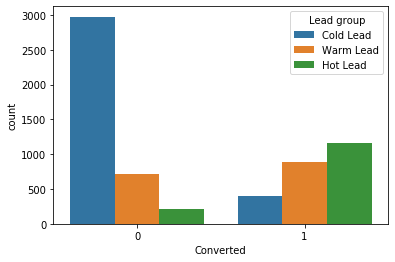

In [142]:
#Lets see the characteristics of the groups we made

sns.countplot(y_train_pred_final['Converted'],hue=y_train_pred_final['Lead group'])

From business perspective we can conclude 3 groups of lead scores. 
<b>Cold lead(<30%)</b>,
    <b>Warm lead (30%-70%)</b>,
    <b>Hot lead (70% + )</b>